In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz

In [9]:
# path = "test_files//20180313-il//tree//min_max_(0,1)//"
path = "test_files//boston//"
file="tmp//dif.csv"
df=pd.read_csv(file,index_col=0) 
# df=df.drop("dot",axis=1)

$$\hat y = \hat y_\text{norm} \times (\max Y - \min Y) + \min Y$$

In [10]:
# t_df=pd.read_excel("tmp//ILDatabase.xlsx",sheetname="il")
# def denormalize_y(y):
#     t=t_df['Mt(AVG)']
#     return y*(t.max()-t.min())+t.min()

def denormalize_y(y):
    return y*(45)+5


trainY=denormalize_y(pd.read_csv(path+"trainY.csv",index_col=0))
trainYhat=denormalize_y(pd.read_csv("tmp//trainYHat.csv",index_col=0))
testY=denormalize_y(pd.read_csv(path+"testY.csv",index_col=0))
testYhat=denormalize_y(pd.read_csv("tmp//testYHat.csv",index_col=0))


In [11]:
fitness_by_generation_min = np.sqrt(denormalize_y(df.groupby(by="generation").train_error.min()))
# fitness_by_generation_min = denormalize_y(df.groupby(by="generation").train_error.min())
fitness_by_generation_testmin = np.sqrt(denormalize_y(df.groupby(by="generation").test_error.min()))
# fitness_by_generation_testmin = denormalize_y(df.groupby(by="generation").test_error.min())

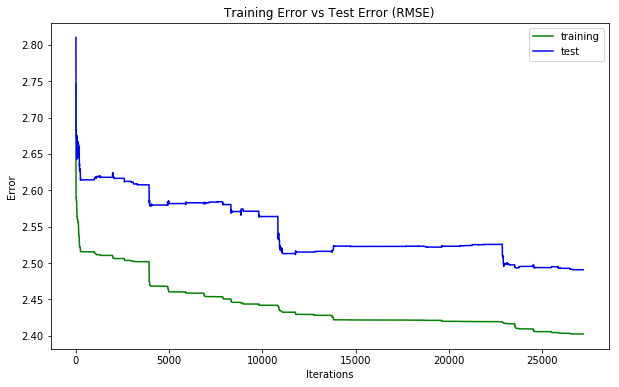

In [12]:
plt.figure(figsize=(10,6))
# plt.gca().set_ylim([13,20])
plt.plot(fitness_by_generation_min,"g",label="training")
plt.plot(fitness_by_generation_testmin,"b",label="test")
plt.title("Training Error vs Test Error (RMSE)")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.legend()
plt.savefig("tmp//error.png")
plt.show()

ValueError: x and y must be the same size

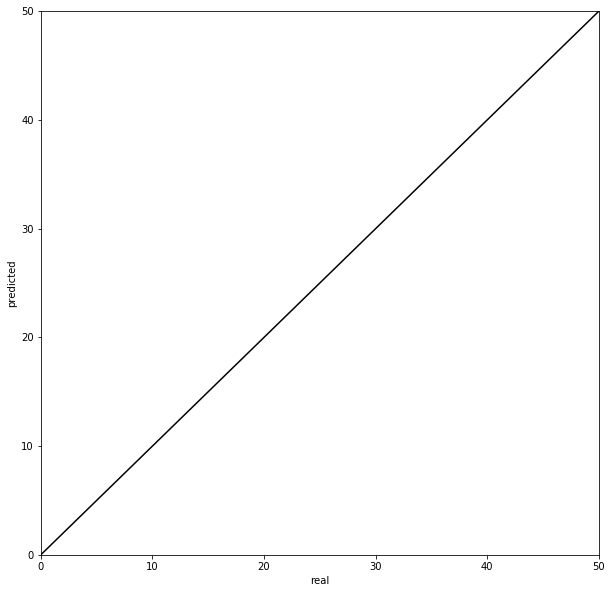

In [13]:
plt.figure(figsize=(10,10))
# plt.axis([-1, 1.0, -1, 1.0])
# plt.axis([150,500,150,500])
plt.axis([0,50,0,50])
plt.plot([trainY.min()-50,trainY.max()+50],[trainY.min()-50,trainY.max()+50],"black")
plt.xlabel("real")
plt.ylabel("predicted")
plt.scatter(trainY.values,trainYhat.values,color="green",label="training")
plt.scatter(testY.values,testYhat.values,color="blue",label="testing")
plt.legend(loc=2)
plt.title("Recocido Simulado")
plt.savefig("tmp//residuals.png")

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


def mape(trainY,trainYhat):
    trainY=trainY.values
    trainYhat = trainYhat.values
    return np.mean(np.abs((trainY - trainYhat) / trainY)) * 100


def rmse(trainY,trainYhat):
    return np.sqrt(mse(trainY,trainYhat))

from sklearn.metrics import r2_score as r2

print("Training","Validation")
# rmse
print(rmse(trainY,trainYhat), rmse(testY,testYhat),sep="\t")
# mae
print(mae(trainY,trainYhat), mae(testY,testYhat),sep="\t")
# mape
print(mape(trainY,trainYhat), mape(testY,testYhat),sep="\t")
# r2
print(r2(trainY,trainYhat), r2(testY,testYhat),sep="\t")


In [21]:
# def best_of_generation(gen=df.generation.max()):
#     return df[df.generation == gen].sort_values(by="train_error").iloc[0]
# def plot_dot(gen=df.generation.max()):
#     return graphviz.Source(best_of_generation(gen)["dot"])

In [87]:
# plot_dot()

In [58]:
# a=(best_of_generation()["dot"])
# f = open('tmp//topology.txt','w')
# f.write(a)
# f.close()

In [59]:
# plot_dot()

In [60]:
# plot_dot().render("tmp//topology")

In [61]:
# pd.read_csv()

In [ ]:
def svr_param_selection(X, y, svr):
    # Cs = [0.1, 0.25, 0.5, 0.75, 1, 2, 3, 10, 20]  #
    # gammas = [0.01, 0.08, 0.1, 0.2, 0.5, 1, 2, 3]  #
    # degree = [2, 3]
    Cs = [0.25, 0.5, 1, 2, 3]  #
    gammas = [0.1, 0.2, 0.5, 1]  #
    # degree = [2, 3]
    # parameters = {'gamma': gammas, 'C': Cs, 'kernel': ('rbf'), "degree": degree}
    parameters = {'gamma': gammas, 'C': Cs}
    grid_search = search(svr, parameters)
    grid_search.fit(X, y)
    return grid_search

from sklearn import svm
svr = svm.SVR()
aux = svr_param_selection(X, self.y_train, svr)
svr = aux.best_estimator_
svr.fit(X, self.y_train)